David Giacobbi \
Gonzaga University \
CPSC 322, Fall 2023


# Exploratory Data Analysis: Heart Risk and Patient Country Data

## Introduction

## Dataset Attributes

The following two datasets will be utilized in this project to provide extensive information on a patient's overall health and well being, including their various attributes pertaining to their country. There are many external factors that could influence the risk of a heart attack in a person. This classifier model will look to see if information concerning a country's economic and health status affects the accesibility to get adequate support and treatment for the heart needs of patients.


### Heart Attack Risk Dataset

The [Heart Attack Risk Dataset](https://www.kaggle.com/datasets/iamsouravbanerjee/heart-attack-prediction-dataset/) was taken from Kaggle's dataset website. It has extensive health and lifestyle habits documented from over 8000 patients from around the world. It has a split of continuous and categorical values, but many will need to be normalized before building the classifier model. Below is the list of attributes from the dataset; most of these will be kept to develop the classifier as they directly pertain to a patient's heart health.

**Number of Instances**: 8763

**Patient ID**: Unique identifier for each patient [Nominal] \
**Age**: Age of the patient [Nominal] \
**Sex**: Gender of the patient (Male/Female) [Nominal] \
**Cholesterol**: Cholesterol levels of the patient [Ratio] \
**Blood Pressure**: Blood pressure of the patient (systolic/diastolic) [Ratio] \
**Heart Rate**: Heart rate of the patient [Ratio] \
**Diabetes**: Whether the patient has diabetes (Yes/No) [Nominal] \
**Family History**: Family history of heart-related problems (1: Yes, 0: No) [Nominal] \
**Smoking**: Smoking status of the patient (1: Smoker, 0: Non-smoker) [Nominal] \
**Obesity**: Obesity status of the patient (1: Obese, 0: Not obese) [Nominal] \
**Alcohol Consumption**: Level of alcohol consumption by the patient (None/Light/Moderate/Heavy) [Nominal] \
**Exercise Hours Per Week**: Number of exercise hours per week [Ratio] \
**Diet**: Dietary habits of the patient (Healthy/Average/Unhealthy) [Ordinal] \
**Previous Heart Problems**: Previous heart problems of the patient (1: Yes, 0: No) [Nominal] \
**Medication Use**: Medication usage by the patient (1: Yes, 0: No) [Nominal] \
**Stress Level**: Stress level reported by the patient (1-10) [Ordinal] \
**Sedentary Hours Per Day**: Hours of sedentary activity per day [Ratio] \
**Income**: Income level of the patient [Ratio] \
**BMI**: Body Mass Index (BMI) of the patient [Ratio] \
**Triglycerides**: Triglyceride levels of the patient [Ratio] \
**Physical Activity Days Per Week**: Days of physical activity per week [Ratio] \
**Sleep Hours Per Day**: Hours of sleep per day [Ratio] \
**Country**: Country of the patient [Nominal] \
**Continent**: Continent where the patient resides [Nominal] \
**Hemisphere**: Hemisphere where the patient resides [Nominal] \
**Heart Attack Risk**: Presence of heart attack risk (1: Yes, 0: No) [Nominal]

### World Country 2023 Dataset

The [World Country 2023 Dataset](https://www.kaggle.com/datasets/nelgiriyewithana/countries-of-the-world-2023/) provides many attributes on various facets of every country's economy, location, and overall population health. Mainly, the population health data will be utilized to analyze how country's health care accessibility make it easier or harder for a patient to become more at risk of a heart attack. Below are the attributes that help to describe each country in the dataset. Many of these attributes will be dropped except the ones related to country health care and overall affordability.

**Number of Instances**: 195

**Country**: Name of the country [Nominal] \
**Density (P/Km2)**: Population density measured in persons per square kilometer [Ratio] \
**Abbreviation**: Abbreviation or code representing the country [Nominal] \
**Agricultural Land (%)**: Percentage of land area used for agricultural purposes [Ratio] \
**Land Area (Km2)**: Total land area of the country in square kilometers [Ratio] \
**Armed Forces Size**: Size of the armed forces in the country [Ratio] \
**Birth Rate**: Number of births per 1,000 population per year [Ratio] \
**Calling Code**: International calling code for the country [Nominal] \
**Capital/Major City**: Name of the capital or major city [Nominal] \
**CO2 Emissions**: Carbon dioxide emissions in tons [Ratio] \
**CPI**: Consumer Price Index, a measure of inflation and purchasing power [Ratio] \
**CPI Change (%)**: Percentage change in the Consumer Price Index compared to the previous year [Interval] \
**Currency Code**: Currency code used in the country [Nominal] \
**Fertility Rate**: Average number of children born to a woman during her lifetime [Ratio] \
**Forested Area (%)**: Percentage of land area covered by forests [Ratio] \
**Gasoline Price**: Price of gasoline per liter in local currency [Interval] \
**GDP**: Gross Domestic Product, the total value of goods and services produced in the country [Ratio] \
**Gross Primary Education Enrollment (%)**: Gross enrollment ratio for primary education [Ratio] \
**Gross Tertiary Education Enrollment (%)**: Gross enrollment ratio for tertiary education [Ratio] \
**Infant Mortality**: Number of deaths per 1,000 live births before reaching one year of age [Ratio] \
**Largest City**: Name of the country's largest city [Nominal] \
**Life Expectancy**: Average number of years a newborn is expected to live [Ratio] \
**Maternal Mortality Ratio**: Number of maternal deaths per 100,000 live births [Ratio] \
**Minimum Wage**: Minimum wage level in local currency [Ratio] \
**Official Language**: Official language(s) spoken in the country [Nominal] \
**Out of Pocket Health Expenditure (%)**: Percentage of total health expenditure paid out-of-pocket by individuals [Ratio] \
**Physicians per Thousand**: Number of physicians per thousand people [Ratio] \
**Population**: Total population of the country [Ratio] \
**Labor Force Participation (%)**: Percentage of the population that is part of the labor force [Ratio] \
**Tax Revenue (%)**: Tax revenue as a percentage of GDP [Ratio] \
**Total Tax Rate**: Overall tax burden as a percentage of commercial profits [Ratio] \
**Unemployment Rate**: Percentage of the labor force that is unemployed [Ratio] \
**Urban Population**: Percentage of the population living in urban areas [Ratio] \
**Latitude**: Latitude coordinate of the country's location [Interval] \
**Longitude**: Longitude coordinate of the country's location [Interval]

## Initial Data Preparation and Cleaning

### Import the DataTable Functions

In [1]:
from data_table import *
from data_learn import *
from data_eval import *
from data_util import *

### Combine the Datasets

Prior to cleaning and dropping unnecessary columns, the two datasets need to be combined into one master dataset.

In [2]:
heart_attributes = ['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'family_history', 'smoking', 'obesity', 
                    'alcohol_csmp', 'exercise_hrs', 'diet', 'prev_heart_prob', 'med_use', 'stress', 'sedentary_hrs', 'income', 'bmi', 'triglycerides', 
                    'phys_act_days', 'sleep_hrs', 'country', 'continent', 'hemisphere', 'heart_attack_risk']

heart_risk_table = DataTable(heart_attributes)
heart_risk_table.load('heart_attack_prediction_dataset.csv')


country_attributes = ['country', 'density', 'abbreviation', 'agri_land', 'land_area', 'armed_forces', 'birth_rate', 'call_code', 'capital', 
                      'co2_emissions', 'cpi', 'cpi_change', 'currency_code', 'fertility_rate', 'forest_area', 'gas_price', 'gdp', 'gpee', 'gtee',
                      'infant_mortality', 'largest_city', 'life_expectancy', 'maternal_mortality', 'min_wage', 'language', 'health_out_pocket', 
                      'physicians', 'population', 'labor_force_pop', 'tax_revenue', 'tax_rate', 'unemploy_rate', 'urban_pop', 'lat', 'lon']

country_table = DataTable(country_attributes)
country_table.load('world-data-2023.csv')

health_table = DataTable.combine(heart_risk_table, country_table, ['country'])

### Drop Unnecessary Rows and Columns

Before cleaning any of the missing values within the dataset, it is important to narrow down the expansive list of attributes into a smaller list of features that would be integral to building the classifier. Many of these dropped tables will come from the World Country dataset. After dropping the unnecessary columns, the following attributes will be cleaned and analyzed deeper with data visualizations:

1. Patient ID
1. Age
1. Sex
1. Cholesterol
1. Blood Pressure
1. Heart Rate
1. Diabetes
1. Smoking
1. Obesity
1. Alcohol Consumption
1. Exercise Hours
1. Stress
1. BMI
1. Triglycerides
1. Sleep Hours
1. Country
1. Heart Attack Risk
1. Birth Rate
1. Fertility Rate
1. Country GDP
1. Life Expectancy
1. Out of Pocket Health Expenditure
1. Physicians

In [3]:
health_table.drop(['family_history', 'diet', 'prev_heart_prob', 'med_use', 'sedentary_hrs', 'income',
                   'phys_act_days', 'continent', 'hemisphere', 'density', 'abbreviation', 'agri_land', 
                   'land_area', 'armed_forces', 'call_code', 'capital', 'co2_emissions', 'cpi', 'cpi_change', 
                   'currency_code', 'forest_area', 'gas_price', 'gpee', 'gtee', 'infant_mortality', 'largest_city', 
                   'maternal_mortality', 'min_wage', 'language', 'population', 'labor_force_pop', 'tax_revenue', 
                   'tax_rate', 'unemploy_rate', 'urban_pop', 'lat', 'lon'])

print(health_table.columns())

['patient_id', 'age', 'sex', 'cholesterol', 'blood_pressure', 'heart_rate', 'diabetes', 'smoking', 'obesity', 'alcohol_csmp', 'exercise_hrs', 'stress', 'bmi', 'triglycerides', 'sleep_hrs', 'country', 'heart_attack_risk', 'birth_rate', 'fertility_rate', 'gdp', 'life_expectancy', 'health_out_pocket', 'physicians']


The next step in cleaning is to check if there are any missing values in the table. If there are a lot, then a middle value calculation will be used to fill the missing value. If there are only a couple, however, the instance will be dropped. The code below shows that there are no missing values in the table, so it is okay to move on to visualizations.

In [4]:
print("Before Removing Missing Values:", health_table.row_count())

health_table = remove_missing(health_table, health_table.columns())
print("After Removing Missing Values", health_table.row_count())

Before Removing Missing Values: 8763
After Removing Missing Values 8763


### Discretizing Values

In order to get achieve an unbiased and accurate classifier, it is necessary to discretize values by placing them in specific bins. This will be most effective when handling continuous values that may not necessarily have great distinction between widths. One great example is age; rather than look at each age uniquely, it would be more helpful to look at age groups (children, young adults, adults, seniors, etc.).  This will be done with the data_util discretize() function. The following bins will be used:

1. **Young Adults**: 18-34
1. **Adults**: 35-64
1. **Seniors**: 65+


In [5]:
discretize(health_table, 'age', [34, 64])

## Initial Data Visualizations and Potential Trends

In order to gage which attributes will be held under the spotlight for the Heart Risk Classifier, distinct trends need to be identified between features. To begin, patient health attributes will be looked at and their direct affect on their own heart attack risk.

### Patient Health Visualizations

For this visualization, the group of patients at risk of heart attack's cholesterol levels will be compared to the cholesterol levels of patients who are not at risk of a heart attack.

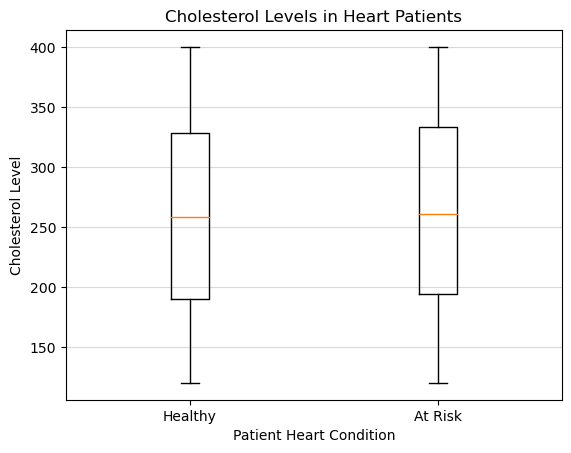

In [6]:
risk_partition = partition(health_table, ['heart_attack_risk'])

risk_distributions = []
for risk in risk_partition:
    risk_distributions.append([row['cholesterol'] for row in risk])

box_plot(risk_distributions, ['Healthy', 'At Risk'], 'Patient Heart Condition', 'Cholesterol Level', 'Cholesterol Levels in Heart Patients')

It is apparent from this box plot that there is very little difference between healthy and at risk patients when it comes to classifying solely based on cholesterol levels. In order to get better classifiers, box plot distributions will be gathered from BMI and triglycerides.

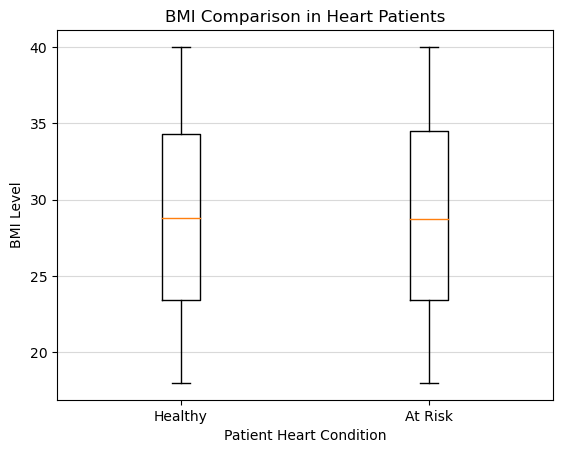

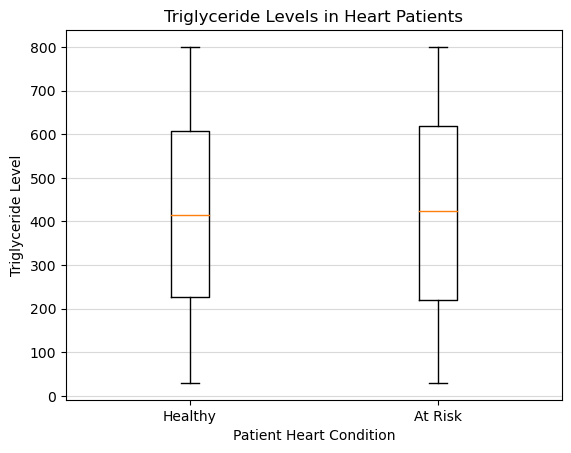

In [7]:
# BMI Levels
bmi_distributions = []
for risk in risk_partition:
    bmi_distributions.append([row['bmi'] for row in risk])

box_plot(bmi_distributions, ['Healthy', 'At Risk'], 'Patient Heart Condition', 'BMI Level', 'BMI Comparison in Heart Patients')

# Triglyceride Levels
tri_distributions = []
for risk in risk_partition:
    tri_distributions.append([row['triglycerides'] for row in risk])

box_plot(tri_distributions, ['Healthy', 'At Risk'], 'Patient Heart Condition', 'Triglyceride Level', 'Triglyceride Levels in Heart Patients')

Although there are not massive differences between the visualizations, a combination of these attributes in the classifier could become a good indicator of heart attack risk patients. However, additional attributes from the global dataset will most likely be needed to make it more accurate.

### Global Health Visualizations

Of the global attributes, the ones that seem most influential are how out of pocket expenditures, life expectancy, and physician accesibility affect one's ability to treat their own heart conditions. Firstly, physician accesibility will be looked at to see if access to a physician affects one's life expectancy. This is depicted in the graph below:

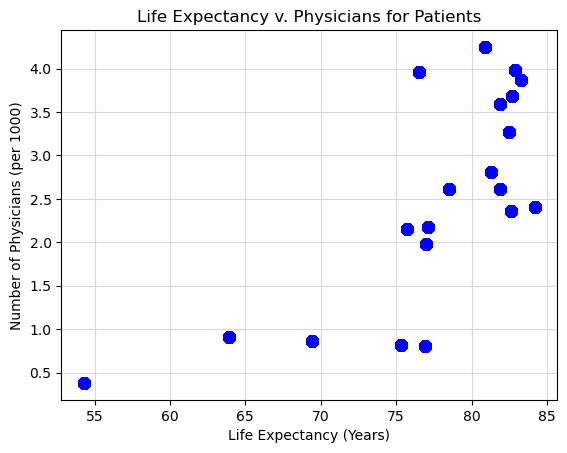

In [8]:
life_ex_values = column_values(health_table, 'life_expectancy')
phys_values = column_values(health_table, 'physicians')

scatter_plot(life_ex_values, phys_values, 'Life Expectancy (Years)', 'Number of Physicians (per 1000)', 'Life Expectancy v. Physicians for Patients')

This dataset reveals a distinct positive correlation between the life expectancy of patients from certain countries compared to their ability to access physician care. Although this reveals such correlation, it is important to note that this is an average life expectancy by country and many personal factors can affect one's own life expectancy (obesity, smoking, etc.). This will be taken into consideration when developing the classifier.

The other important attribute is out of pocket health expenditures. In the dataset, it is represented as a percent of the total medical bill. If it is difficult to afford health services, then chances are that patients may be more at risk of suffering from heart attacks as treatment can be difficult to attain. One way would be to see how expenditures are distributed across the patients. If they all share the same expenditures, it is not worth exploring. However, if expenditures vary greatly, then this could be a useful factor to look at.

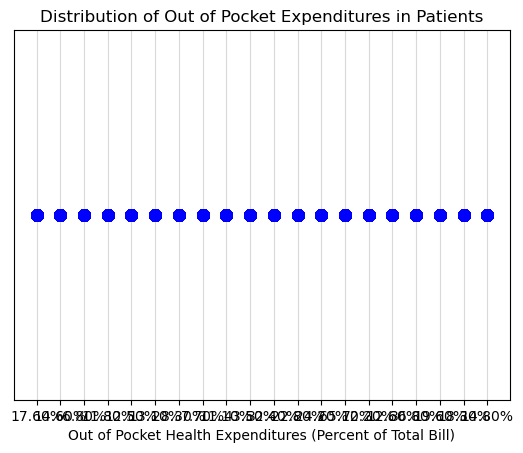

In [9]:
expend_values = column_values(health_table, 'health_out_pocket')

dot_chart(expend_values, 'Out of Pocket Health Expenditures (Percent of Total Bill)', 'Distribution of Out of Pocket Expenditures in Patients')

This reveals that there is an almost even distribution of expenditures, and it would be worth exploring more to see if these directly affect the prediction of one's health.

### Link Between Global and Patient Health

In order to ensure there is a link between global and patient health, a visualization will be made of how many patients come from each country to get an idea of how their locations are distributed across the dataset as well as how each country's risk varies. 

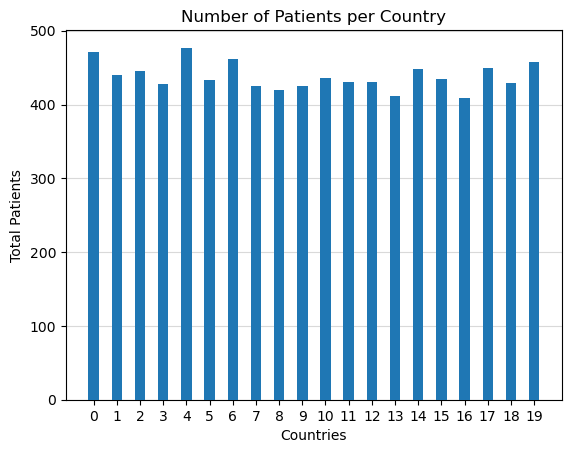

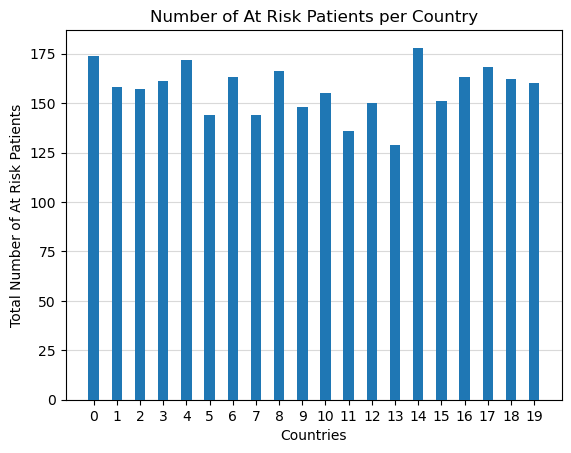

In [10]:
# Partition the dataset by country
country_partition = partition(health_table, ['country'])


# Total amount of patients in each country
country_patients = []
for country in country_partition:
    country_patients.append(len(column_values(country, 'heart_attack_risk')))

country_label = [i for i in range(len(country_partition))]

bar_chart(country_patients, country_label, 'Countries', 'Total Patients', 'Number of Patients per Country')


# Total amount of at risk patients in each country
country_risk_values = []
for country in country_partition:
    count_list = []
    for row in country:
        if row['heart_attack_risk'] == 1:
            count_list.append(1)
    country_risk_values.append(sum(count_list))

bar_chart(country_risk_values, country_label, 'Countries', 'Total Number of At Risk Patients', 'Number of At Risk Patients per Country')

These visualizations hint at the fact that countries may not necessarily be a deciding factor when it comes to patient risk to heart attacks. Even thought the number of at risk patients vary, they nearly mirror the distribution of total patients. Nevertheless, it is worth to see if the slight nuances can be picked up on by the classifier model constructed below.

## Features for Heart Risk Classifier

To begin, an initial list of classifier attributes will be selected based off of the initial visualizations as well as previous knowledge about tested indicators of heart attacks. The list of attributes includes both continuous and categorical data, which should help to create a well-rounded predictor utilizing classifier methods discussed in class (kNN, Naive Bayes, Decision Trees, etc.). Below is a brief explanation as to why the attribute is under consideration for use in the tailored classifier and its corrresponding attribute type.

1. **Age**: [Categorical], health risk increases with time often with older people being more at risk
1. **Cholesterol**: [Continuous], visualization showed a slight jump in risk for patients with higher cholesterol
1. **Heart Rate**: [Continuous], average heart rate ties very close to physical activity which was revealed in BMI and triglyceride visualizations
1. **Diabetes**: [Categorical], closely related to BMI and triglyceride visualizations and describes physical ailments more
1. **Smoking**: [Categorical], acknowledged health trend that makes one more inclined to cardiovascular disease
1. **Alcohol Consumption**: [Categorical], acknowledged health trend that makes one more inclined to cardiovascular disease
1. **Exercise Hours**: [Continuous], further distinguishes nuances in patient physical activity
1. **Stress**: [Categorical], another contributing factor to issues with overall heart health
1. **Triglycerides**: [Continuous], trend revealed in initial data visualization
1. **BMI**: [Continuous], trend revealed in initial data visualization
1. **Country**: [Categorical], potential link to health care accesibility as shown in above visualizations
1. **Life Expectancy**: [Continuous], potential affected result of health care accessibility
1. **Out of Pocket Health Expenditure**: [Continuous], trend revealed in visualizations above
1. **Physicians**: [Continuous], linked to life expectancy and shown to vary throughout dataset

## kNN and Naive Bayes Classifier Experimentation

In this section, Naive Bayes and kNN Classifier Models will be used to test and tune the best machine learning approach for the dataset. After preparing features to test by normalizing continuous values, the above models will be implemented and evaluated with a variety of effectiveness metrics. After analyzing the metrics of each model, next steps can be made in refining the model.


### Normalize Continuous Features

In order to remove weight bias from certain features, it is necessary that all continuous features are normalized. The following features will be normalized for analysis:

1. Cholesterol
1. Heart Rate
1. Exercise Hours
1. Triglycerides
1. BMI
1. Life Expectancy
1. Out of Pocket Expenditures
1. Physicians

In [11]:
# Change string values to decimals
for row in health_table:
    current_str = row['health_out_pocket']
    row['health_out_pocket'] = float(current_str.strip('%'))

# Normalize data features
cont_features = ['cholesterol', 'heart_rate', 'exercise_hrs', 'bmi', 'triglycerides', 'life_expectancy', 'health_out_pocket', 'physicians']
for feature in cont_features:
    normalize(health_table, feature)

The next step is to create a holdout train and test set to use on the initial kNN and Naive Bayes classifier. The following sets will be randomly distributed into an 80% train set and 20% test set.

In [22]:
train, test = holdout(health_table, int(health_table.row_count()*0.2))

### kNN Classifier

In [23]:
# Evaluate a stratified 
knn_matrix = knn_eval(train, test, majority_vote, 7, 'heart_attack_risk', ['cholesterol', 'heart_rate', 'exercise_hrs', 'triglycerides', 'bmi', 'sleep_hrs'], 
                                                                          ['age', 'sex', 'diabetes', 'obesity',  'smoking', 'alcohol_csmp', 'stress'])
print(knn_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(health_table, ['heart_attack_risk']):
    acc.append(accuracy(knn_matrix, label))
    prec.append(precision(knn_matrix, label))
    rec.append(recall(knn_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(health_table, ['heart_attack_risk']):
    cur_recall = recall(knn_matrix, label)
    cur_precision = precision(knn_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))


  actual    0    1
--------  ---  ---
       0  897  243
       1  466  146

Average Accuracy: 0.5953196347031964

Average Precision: 0.5167142267076821

Average Recall: 0.5127020983832129

Macro Average f-measure: 0.5042241019068826


### Naive Bayes Classifier

In [24]:
# Evaluate a stratified 
k_fold_matrix = naive_bayes_eval(train, test, 'heart_attack_risk', [], ['age', 'sex', 'diabetes', 'obesity', 'smoking', 'alcohol_csmp', 'stress', 'country']) 
                                                                    
print(k_fold_matrix)

# Compute accuracy, precision, recall
acc = []
prec = []
rec = []
for label in distinct_values(health_table, ['heart_attack_risk']):
    acc.append(accuracy(k_fold_matrix, label))
    prec.append(precision(k_fold_matrix, label))
    rec.append(recall(k_fold_matrix, label))

print("\nAverage Accuracy:", sum(acc)/len(acc))
print("\nAverage Precision:", sum(prec)/len(prec))
print("\nAverage Recall:", sum(rec)/len(rec))

# Calculate the macro average f-measure
f_measures = []
for label in distinct_values(health_table, ['heart_attack_risk']):
    cur_recall = recall(k_fold_matrix, label)
    cur_precision = precision(k_fold_matrix, label)
    f_measures.append((2 * cur_precision * cur_recall) / (cur_recall + cur_precision))
print("\nMacro Average f-measure:", sum(f_measures)/len(f_measures))

  actual     0    1
--------  ----  ---
       0  1140    0
       1   612    0

Average Accuracy: 0.6506849315068494

Average Precision: 0.8253424657534247

Average Recall: 0.5

Macro Average f-measure: 0.3941908713692946


### Post-Evaluation Conclusion

The first classifiers that were built are, unfortunately, not so accurate. The kNN classifier has a much better f-measure than the Naive Bayes classifier, but is still struggling to perform given the limited list of labels to classify from. I think that one possible issue is that there are too many attributes being looked at. In order to get a better predictor, it would be worth exploring more direct relationships between heart risk and features to see which top ones perform. It appears that the abundance of attributes may be causing the distances and probabilities to skew closer to just guessing as the model does not have enough instances given the amount of features being analyzed.

Another important aspect to mention is the fact that the Naive Bayes classifier only selected no heart risk for all the patients. This is not an accurate classifier at all as it has no variety or indicator of choice. One inference is that when two labels have the top probability, then the first option is always selected. In this case no heart risk could be selected every time, even in cases where it is tied with at risk patients.

The next steps would be to tune the kNN classifier and potentially look at decision trees as the third classifier. With kNN a variety of otpions could be implemented such as a different k value, reduced categorical or continuous features, and a different voting scheme. Depending on how well the decision tree performs, it may also be worth investigating if continuous values in the Naive Bayes classifier affects its overall accuracy.